In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy.stats import wilcoxon

sns.set_style("whitegrid")

In [2]:
ls dies6_rep3/

mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_ARS305_end_LexA.txt
mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_ARS313_end_LexA.txt
mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_ARS315_starting_LexA.txt
mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_ARS316_end_LexA.txt
mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_in_vitro_nucl_array.txt
mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_plasmid313_4133_4058.txt
mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_plasmid315_1058_983.txt
mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_plasmid316_1586_1511.txt


In [4]:
load_dir = "dies6_rep3"

In [9]:
ARS313_ori = np.loadtxt(load_dir + "/mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_ARS313_end_LexA.txt")
ARS313_plasmid = np.loadtxt(load_dir + "/mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_plasmid313_4133_4058.txt")

ARS315_ori = np.loadtxt(load_dir + "/mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_ARS315_starting_LexA.txt")
ARS315_plasmid = np.loadtxt(load_dir + "/mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_plasmid315_1058_983.txt")

ARS316_ori = np.loadtxt(load_dir + "/mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_ARS316_end_LexA.txt")
ARS316_plasmid = np.loadtxt(load_dir + "/mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_plasmid316_1586_1511.txt")

In [10]:
#summarise samples
array_dic = {"ARS313_ori": ARS313_ori,
             "ARS313_plasmid": ARS313_plasmid,
             "ARS315_ori": ARS315_ori,
             "ARS315_plasmid": ARS315_plasmid,
             "ARS316_ori": ARS316_ori,
             "ARS316_plasmid": ARS316_plasmid,
             
            }

summary=pd.DataFrame()
for element in array_dic.keys():
    summary[element] = pd.DataFrame(array_dic[element].mean(axis=0)).describe()
summary = summary.T
summary["#molecules"] = [array_dic[sample].shape[0] for sample in summary.index]
summary["#nucleotides"] = [array_dic[sample].shape[1] for sample in summary.index]
#summary = summary.T
summary

,count,mean,std,min,25%,50%,75%,max,#molecules,#nucleotides
ARS313_ori,1036.0,0.011632,0.017694,0.0,0.001695,0.005085,0.013559,0.145763,590,1036
ARS313_plasmid,4785.0,0.123902,0.124619,0.0,0.031250,0.083333,0.177083,0.666667,192,4785
ARS315_ori,1237.0,0.020899,0.029474,0.0,0.003300,0.009901,0.026403,0.168317,303,1237
ARS315_plasmid,4758.0,0.116834,0.136483,0.0,0.034483,0.068966,0.172414,0.758621,29,4758
ARS316_ori,1240.0,0.020363,0.047524,0.0,0.000000,0.000000,0.000000,0.333333,12,1240
ARS316_plasmid,4785.0,0.125478,0.116917,0.0,0.032258,0.090323,0.187097,0.612903,155,4785


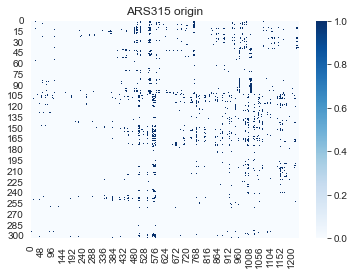

Text(0.5, 1.0, 'ARS315 plasmid')

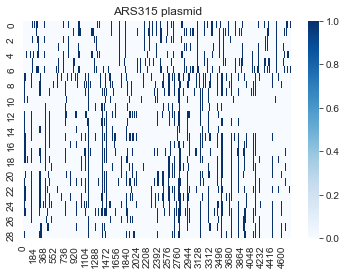

In [11]:
sns.heatmap(ARS315_ori, cmap="Blues")
plt.title("ARS315 origin")
plt.show()

sns.heatmap(ARS315_plasmid, cmap="Blues")
plt.title("ARS315 plasmid")

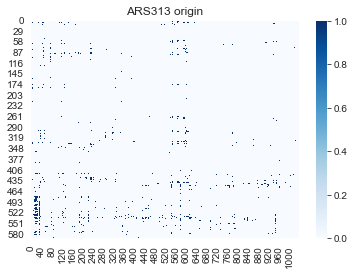

Text(0.5, 1.0, 'ARS313 plasmid')

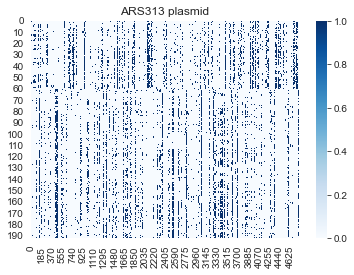

In [14]:
sns.heatmap(ARS313_ori, cmap="Blues")
plt.title("ARS313 origin")
plt.show()

sns.heatmap(ARS313_plasmid, cmap="Blues")
plt.title("ARS313 plasmid")

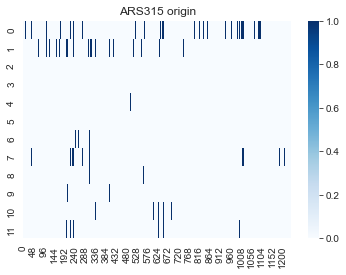

Text(0.5, 1.0, 'ARS315 plasmid')

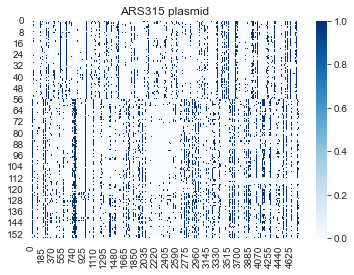

In [13]:
sns.heatmap(ARS316_ori, cmap="Blues")
plt.title("ARS315 origin")
plt.show()

sns.heatmap(ARS316_plasmid, cmap="Blues")
plt.title("ARS315 plasmid")

In [35]:
len(list(range(4081,4791)))

ARS305_wt_rep4_plasmid.mean(axis=0)[4081:4791].shape

(543,)

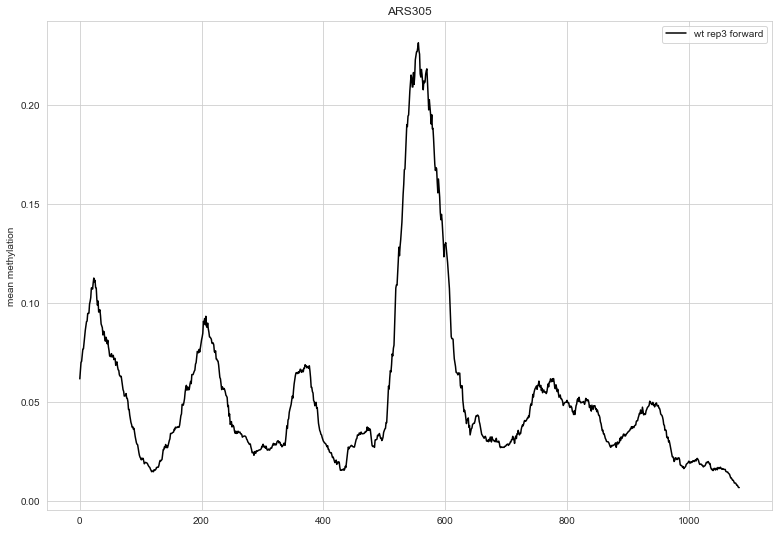

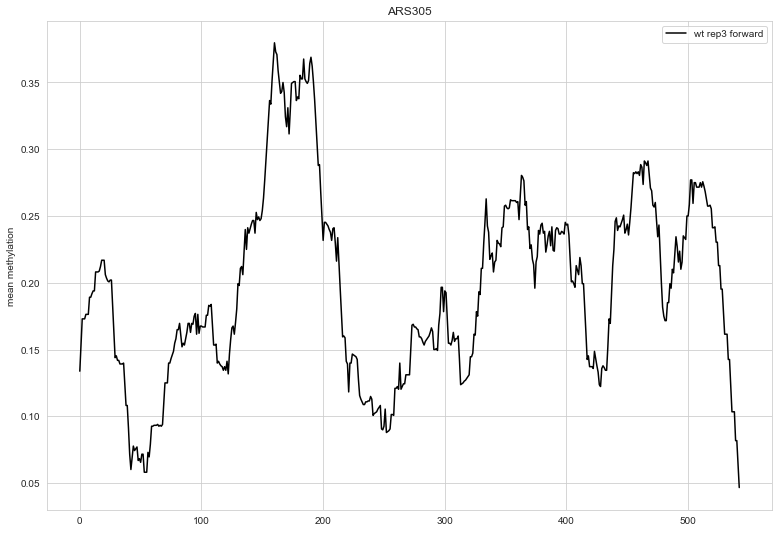

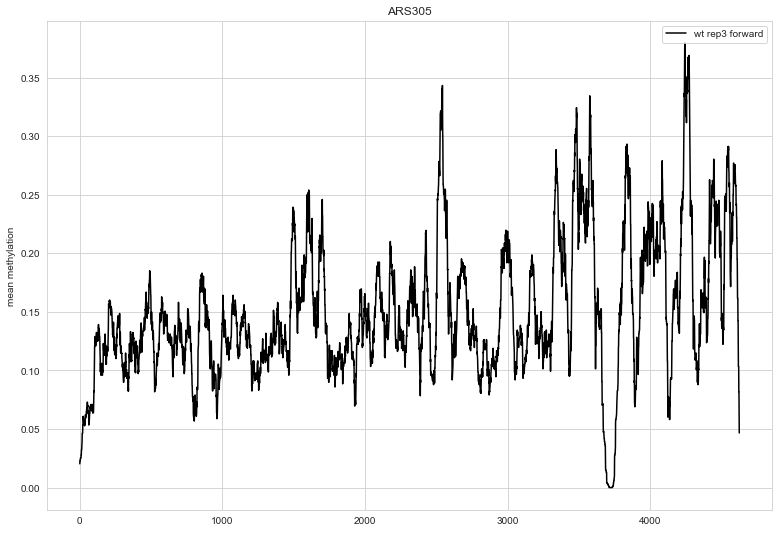

In [45]:
N=40

plt.figure(figsize=(13, 9))
sns.lineplot(x = range(1084), y = np.convolve(ARS305_wt_rep4_ori.mean(axis=0), np.ones(N)/N, mode ="same")
             , color ="black", label="wt rep3 forward")
plt.ylabel("mean methylation")
plt.title("ARS305")
plt.show()

plt.figure(figsize=(13, 9))
sns.lineplot(x = range(543), y = np.convolve(ARS305_wt_rep4_plasmid.mean(axis=0)[4081:4791], np.ones(N)/N, mode ="same")
             , color ="black", label="wt rep3 forward")
plt.ylabel("mean methylation")
plt.title("ARS305")
plt.show()

plt.figure(figsize=(13, 9))
sns.lineplot(x = range(4624), y = np.convolve(ARS305_wt_rep4_plasmid.mean(axis=0), np.ones(N)/N, mode ="same")
             , color ="black", label="wt rep3 forward")
plt.ylabel("mean methylation")
plt.title("ARS305")
plt.show()

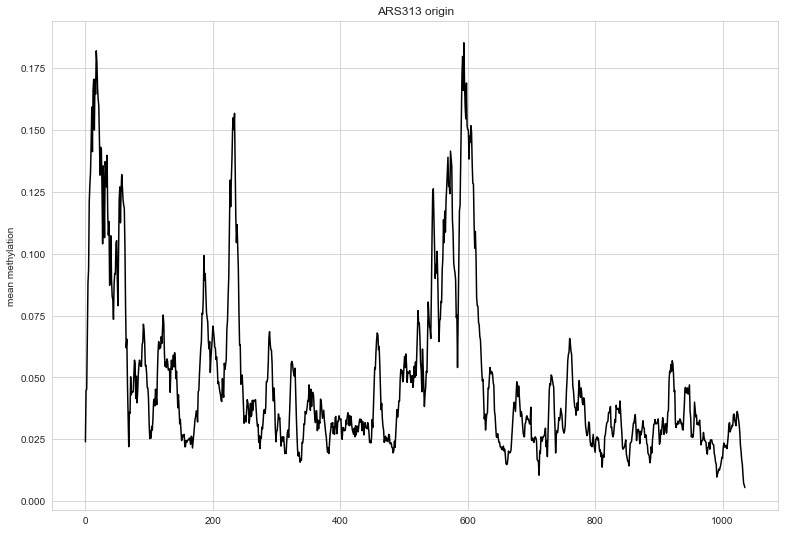

ValueError: All arrays must be of the same length

<Figure size 936x648 with 0 Axes>

In [49]:
N=10

plt.figure(figsize=(13, 9))
sns.lineplot(x = range(ARS313_wt_rep4_ori.shape[1]), y = np.convolve(ARS313_wt_rep4_ori.mean(axis=0), np.ones(N)/N, mode ="same")
             , color ="black")
plt.ylabel("mean methylation")
plt.title("ARS313 origin")
plt.show()

plt.figure(figsize=(13, 9))
sns.lineplot(x = range(669), 
             y = np.convolve(ARS313_wt_rep4_ori.mean(axis=0)[214:894], np.ones(N)/N, mode ="same")
             , color ="black")
sns.lineplot(x = range(669), y = np.convolve(ARS313_wt_rep4_plasmid.mean(axis=0)[:669], np.ones(N)/N, mode ="same")
             , color ="purple")
plt.ylabel("mean methylation")
plt.title("ARS313 plasmid")
plt.show()

In [51]:
len(list(range(214,894)))

680